In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load Excel Data
df = pd.read_excel("C:/Users/ACER/Desktop/DataAnalyticsTasks/sales_data_sample.xlsx")

In [ ]:
# Clean Column Names
df.columns = df.columns.str.strip()
print("Columns:", df.columns.tolist())

Columns: ['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE']


In [ ]:
# Rename Columns
df = df[["PRODUCTCODE", "QUANTITYORDERED", "SALES", "PRICEEACH"]]
df = df.rename(columns={
    "PRODUCTCODE": "product",
    "QUANTITYORDERED": "quantity",
    "SALES": "revenue",
    "PRICEEACH": "price"
})

In [ ]:
# Drop missing values
df = df.dropna()
print("Sample cleaned data:")
print(df.head())

Sample cleaned data:
    product  quantity  revenue   price
0  S10_1678        30  2871.00   95.70
1  S10_1678        34  2765.90   81.35
2  S10_1678        41  3884.34   94.74
3  S10_1678        45  3746.70   83.26
4  S10_1678        49  5205.27  100.00


In [ ]:
# Create SQLite DB and Insert Data
sqlite_conn = sqlite3.connect("sales_data.db")
df.to_sql("sales_data_sample", sqlite_conn, if_exists="replace", index=False)

2823

In [ ]:
# SQL Query on SQLite
query = """
    SELECT product,
           SUM(quantity) AS total_quantity,
           SUM(revenue) AS total_revenue
    FROM sales_data_sample
    GROUP BY product
"""

In [8]:
summary_df = pd.read_sql_query(query, sqlite_conn)
print("Summary:")
print(summary_df)

Summary:
       product  total_quantity  total_revenue
0     S10_1678             944       97107.00
1     S10_1949             961      191073.03
2     S10_2016             928      106017.46
3     S10_4698             921      170401.07
4     S10_4757             952      113093.73
..         ...             ...            ...
104  S700_3505             917       88565.41
105  S700_3962             852       80482.72
106  S700_4002            1029       76175.63
107   S72_1253             920       51661.82
108   S72_3212             927       61064.10

[109 rows x 3 columns]


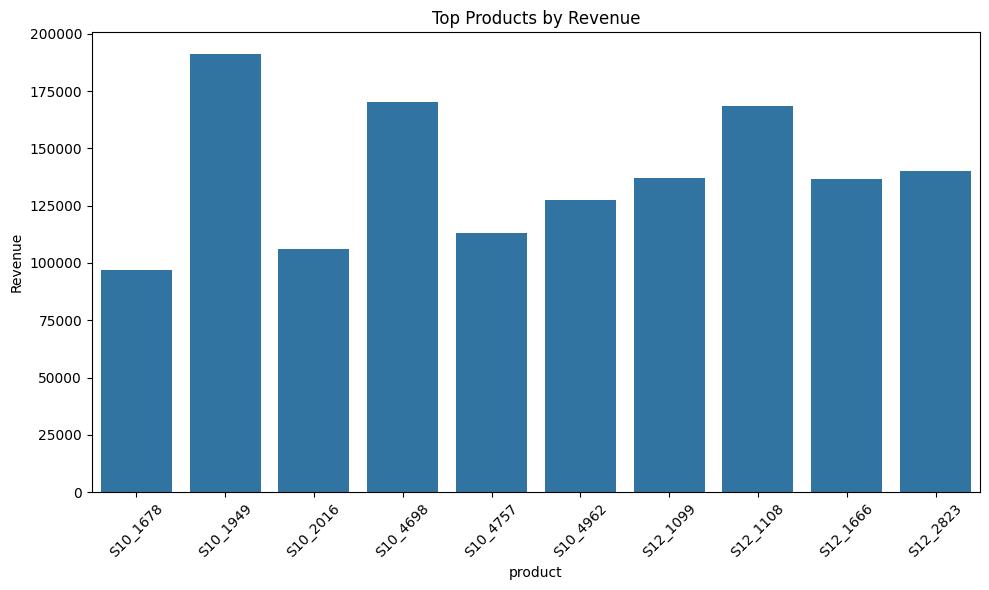

In [ ]:
# Plot - Revenue by Product
plt.figure(figsize=(10,6))
sns.barplot(data=summary_df.head(10), x='product', y='total_revenue')
plt.title("Top Products by Revenue")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_15452\3595865402.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df.head(10), x='product', y='total_quantity', palette='coolwarm')


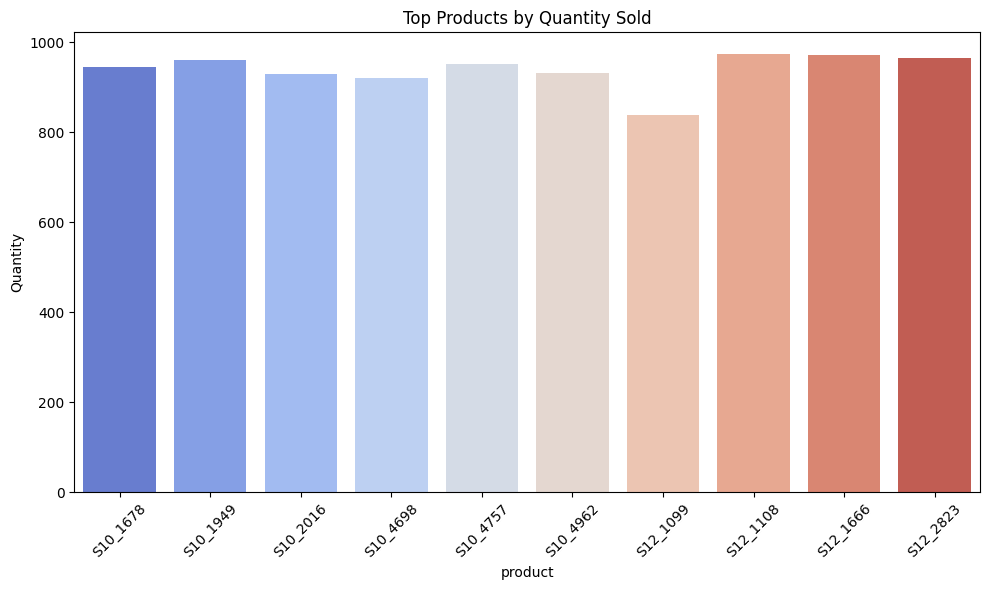

In [ ]:
# Plot - Quantity by Product
plt.figure(figsize=(10,6))
sns.barplot(data=summary_df.head(10), x='product', y='total_quantity', palette='coolwarm')
plt.title("Top Products by Quantity Sold")
plt.ylabel("Quantity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("top_products_by_revenue.png")

plt.show()

In [13]:
import os
print("Saving location:", os.getcwd())

Saving location: c:\Users\ACER\Downloads
